In [ ]:
# < 첫 모델 : SGD 경사 하강법>

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import os as os
from sklearn.model_selection import train_test_split

In [ ]:
#train 데이터 불러오기
from google.colab import files
file_uploaded = files.upload()

In [ ]:
#test 데이터 불러오기
from google.colab import files
file_uploaded = files.upload()

In [ ]:
train_orig = pd.read_csv('train.csv')
test_orig = pd.read_csv('test.csv')

In [ ]:
X = train_orig.drop(['label'], axis = 1)

In [ ]:
label = train_orig.label

In [ ]:
y = pd.get_dummies(label, columns=['label'], drop_first=False)

In [ ]:
x_train,x_test,y_train,y_test = train_test_split(X,y,test_size = 0.2, random_state = 1004)

In [ ]:
print("Shape of x_train :", x_train.shape)
print("Shape of x_test :", x_test.shape)
print("Shape of y_train :", y_train.shape)
print("Shape of y_test :", y_test.shape)

In [ ]:
from sklearn.datasets import fetch_openml
mnist = fetch_openml('mnist_784', version =1)
mnist.keys()

In [ ]:
X,y = mnist["data"], mnist["target"]
X.shape

In [ ]:
y.shape

In [ ]:
mport matplotlib as mpl
import matplotlib.pyplot as plt

some_digit = X[0]
some_digit_image = some_digit.reshape(28,28)

#이미지의 feature 벡터를 28*28 배열로 크기 변환

plt.imshow(some_digit_image, cmap = "binary")
plt.axis("off")
plt.show

#imshow 함수를 사용해 그려주기

In [ ]:
y[0]

In [ ]:
# 결과값이 문자열로 나옴.
# 머신러닝 알고리즘에서는 숫자를 사용하여야 하므로 y를 정수로 변환해줘야함

In [ ]:
import numpy as np
y = y.astype(np.uint8)

In [ ]:
y[0]

In [ ]:
def plot_digits(instances, images_per_row=10, **options):
    size = 28
    images_per_row = min(len(instances), images_per_row)
    images = [instance.reshape(size,size) for instance in instances]
    n_rows = (len(instances) - 1) // images_per_row + 1
    row_images = []
    n_empty = n_rows * images_per_row - len(instances)
    images.append(np.zeros((size,size * n_empty)))
    for row in range(n_rows):
        rimages = images[row * images_per_row : (row +1) * images_per_row]
        row_images.append(np.concatenate(rimages,axis=1))
    image = np.concatenate(row_images,axis=0)
    plt.imshow(image,cmap = mpl.cm.binary, **options)
    plt.axis("off")
    
plt.figure(figsize=(9,9))
example_images = X[:100]
plot_digits(example_images, images_per_row=10)
#save_fig("more_digits_plot")
plt.show()

In [ ]:
# 데이터 분리
X_train, X_test, y_train, y_test = X[:60000], X[60000:], y[:60000],y[60000:]

In [ ]:
y_train_5 = (y_train == 5)
y_test_5 = (y_test == 5)

In [ ]:
# 첫번째 모델 : SGDClassifier클래스의 확률적 경사 하강법
# SGD는 Loss function 계산 시 전체가 아닌 일부 데이터셋을 이용하기 때문에 속도가 빨라서 매우 큰 데이터셋을 다르는데 효과적

In [ ]:
from sklearn.linear_model import SGDClassifier

sgd_clf = SGDClassifier(random_state = 42)
sgd_clf.fit(X_train, y_train_5)

In [ ]:
sgd_clf.predict([some_digit])

In [ ]:
# 성능측정
# 1.cross validation을 사용한 accuracy측정

In [ ]:
from sklearn.model_selection import StratifiedKFold
from sklearn.base import clone
skfolds = StratifiedKFold(n_splits=3,random_state = 42)

for train_index, test_index in skfolds.split(X_train, y_train_5):
    clone_clf = clone(sgd_clf)
    X_train_folds = X_train[train_index]
    y_train_folds = y_train_5[train_index]
    X_test_fold = X_train[test_index]
    y_test_fold = y_train_5[test_index]
    
    clone_clf.fit(X_train_folds, y_train_folds)
    y_pred = clone_clf.predict(X_test_fold)
    n_correct = sum(y_pred == y_test_fold)
    print(n_correct/len(y_pred))

In [ ]:
from sklearn.model_selection import cross_val_score

cross_val_score(sgd_clf, X_train, y_train_5, cv = 3, scoring = "accuracy")

In [ ]:
from sklearn.base import BaseEstimator

class Never5Classifier(BaseEstimator):
    def fit(self,X,y=None):
        return self
    def predict(self,X):
        return np.zeros((len(X),1),dtype=bool)

In [ ]:
never_5_clf = Never5Classifier()
cross_val_score(never_5_clf,X_train,y_train_5,cv=3,scoring="accuracy"

In [ ]:
# 성능측정
# 2.오차행렬

In [ ]:
from sklearn.model_selection import cross_val_predict
y_train_pred = cross_val_predict(sgd_clf, X_train, y_train_5, cv = 3)

In [ ]:
from sklearn.metrics import confusion_matrix
confusion_matrix(y_train_5,y_train_pred)

In [ ]:
# 3.5 에러 분석
# 오차 행렬 살펴보기

In [ ]:
y_train_pred = cross_val_predict(sgd_clf, X_train_scaled, y_train, cv=3)
conf_mx = confusion_matrix(y_train, y_train_pred)
conf_mx

In [ ]:
# 예측 틀린 데이터 시각화
plt.matshow(conf_mx, cmap = plt.cm.gray)
plt.show ()

In [ ]:
row_sums = conf_mx.sum(axis=1, keepdims=True)
norm_conf_mx = conf_mx / row_sums

In [ ]:
np.fill_diagonal(norm_conf_mx, 0)
plt.matshow(norm_conf_mx, cmap=plt.cm.gray)
plt.show()

In [24]:
# < 케라스로 CNN 튜토리얼 해보기 >

In [1]:
#필요한 모듈 불러오기
import warnings
warnings.simplefilter(action='ignore', category=FutureWarning)

import sys
import tensorflow as tf
import keras

from keras.models import Sequential
from keras.layers import Dense, Dropout, Flatten
from keras.layers.convolutional import Conv2D, MaxPooling2D
import numpy as np
np.random.seed(7)

print('Python version : ', sys.version)
print('TensorFlow version : ', tf.__version__)
print('Keras version : ', keras.__version__)

Python version :  3.6.9 (default, Oct  8 2020, 12:12:24) 
[GCC 8.4.0]
TensorFlow version :  2.4.1
Keras version :  2.4.3


In [2]:
# keras에서 제공하는 MNIST데이터를 받고, 사용할 수 있게 train과 test 데이터를 만들어줌
img_rows = 28
img_cols = 28

(x_train, y_train), (x_test, y_test) = keras.datasets.mnist.load_data()

input_shape = (img_rows, img_cols, 1)
x_train = x_train.reshape(x_train.shape[0], img_rows, img_cols, 1)
x_test = x_test.reshape(x_test.shape[0], img_rows, img_cols, 1)

x_train = x_train.astype('float32') / 255.
x_test = x_test.astype('float32') / 255.

print('x_train shape:', x_train.shape)
print(x_train.shape[0], 'train samples')
print(x_test.shape[0], 'test samples')

batch_size = 128
num_classes = 10
epochs = 12

y_train = keras.utils.to_categorical(y_train, num_classes)
y_test = keras.utils.to_categorical(y_test, num_classes)

11493376/11490434 [==============================] - 0s 0us/step
x_train shape: (60000, 28, 28, 1)
60000 train samples
10000 test samples


In [3]:
#입출력 관계와 층구조
model = Sequential()
model.add(Conv2D(32, kernel_size=(5, 5), strides=(1, 1), padding='same',
                 activation='relu',
                 input_shape=input_shape))
model.add(MaxPooling2D(pool_size=(2, 2), strides=(2, 2)))
model.add(Conv2D(64, (2, 2), activation='relu', padding='same'))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.25))
model.add(Flatten())
model.add(Dense(1000, activation='relu'))
model.add(Dropout(0.5))
model.add(Dense(num_classes, activation='softmax'))
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 28, 28, 32)        832       
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 14, 14, 32)        0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 14, 14, 64)        8256      
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 7, 7, 64)          0         
_________________________________________________________________
dropout (Dropout)            (None, 7, 7, 64)          0         
_________________________________________________________________
flatten (Flatten)            (None, 3136)              0         
_________________________________________________________________
dense (Dense)                (None, 1000)              3

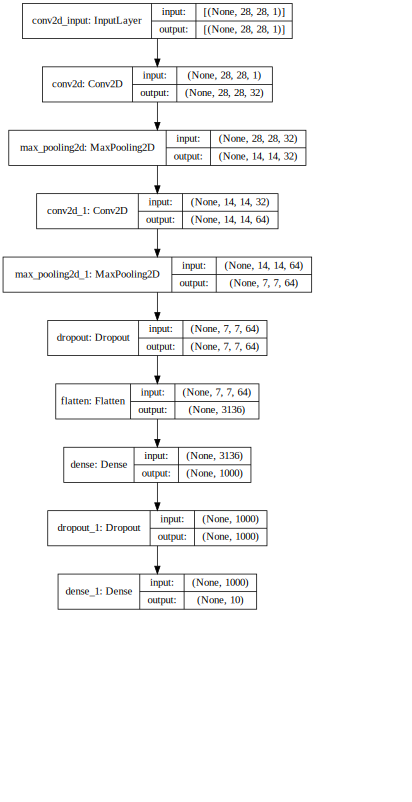

In [7]:
#시각화
from IPython.display import SVG
from keras.utils.vis_utils import model_to_dot
%matplotlib inline

SVG(model_to_dot(model, show_shapes=True,dpi=55).create(prog='dot', format='svg'))

In [8]:
#fit~ 시작
model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])
hist = model.fit(x_train, y_train,
                 batch_size=batch_size,
                 epochs=epochs,
                 verbose=1, 
                 validation_data=(x_test, y_test))

Epoch 1/12
469/469 [==============================] - 82s 172ms/step - loss: 0.4373 - accuracy: 0.8615 - val_loss: 0.0413 - val_accuracy: 0.9866
Epoch 2/12
469/469 [==============================] - 82s 176ms/step - loss: 0.0618 - accuracy: 0.9802 - val_loss: 0.0386 - val_accuracy: 0.9863
Epoch 3/12
469/469 [==============================] - 81s 173ms/step - loss: 0.0456 - accuracy: 0.9854 - val_loss: 0.0296 - val_accuracy: 0.9905
Epoch 4/12
469/469 [==============================] - 81s 173ms/step - loss: 0.0370 - accuracy: 0.9881 - val_loss: 0.0281 - val_accuracy: 0.9914
Epoch 5/12
469/469 [==============================] - 85s 182ms/step - loss: 0.0291 - accuracy: 0.9911 - val_loss: 0.0231 - val_accuracy: 0.9932
Epoch 6/12
469/469 [==============================] - 81s 172ms/step - loss: 0.0254 - accuracy: 0.9927 - val_loss: 0.0198 - val_accuracy: 0.9938
Epoch 7/12
469/469 [==============================] - 80s 171ms/step - loss: 0.0226 - accuracy: 0.9920 - val_loss: 0.0249 - val_ac

In [8]:
#test 데이터에 대한 accuracy
score = model.evaluate(x_test, y_test, verbose=0)
print('Test loss:', score[0])
print('Test accuracy:', score[1])

Test loss: 0.025037094950675964
Test accuracy: 0.9923999905586243


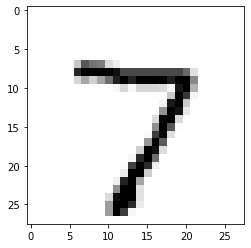

The Answer is  [7]


/usr/local/lib/python3.6/dist-packages/tensorflow/python/keras/engine/sequential.py:450: UserWarning: `model.predict_classes()` is deprecated and will be removed after 2021-01-01. Please use instead:* `np.argmax(model.predict(x), axis=-1)`,   if your model does multi-class classification   (e.g. if it uses a `softmax` last-layer activation).* `(model.predict(x) > 0.5).astype("int32")`,   if your model does binary classification   (e.g. if it uses a `sigmoid` last-layer activation).
  warnings.warn('`model.predict_classes()` is deprecated and '


In [11]:
import matplotlib.pyplot as plt
n = 0
plt.imshow(x_test[n].reshape(28, 28), cmap='Greys', interpolation='nearest')
plt.show()

print('The Answer is ', model.predict_classes(x_test[n].reshape((1, 28, 28, 1))))

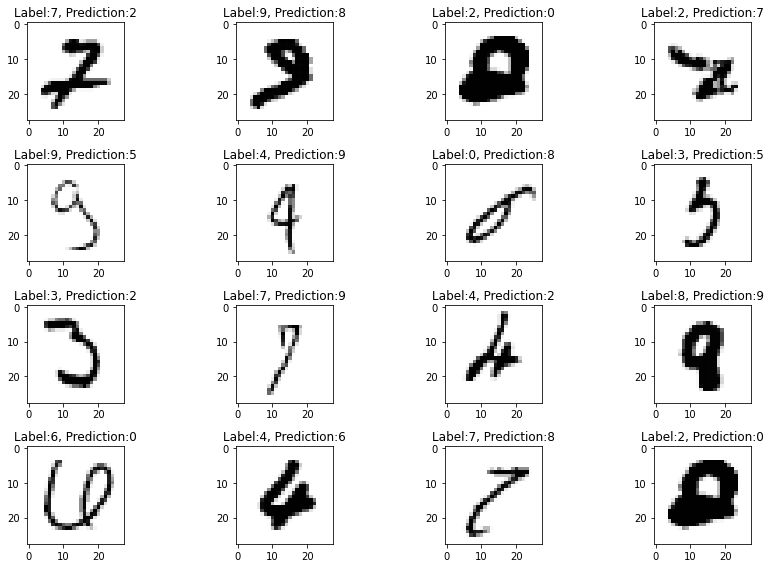

In [12]:
import random

predicted_result = model.predict(x_test)
predicted_labels = np.argmax(predicted_result, axis=1)

test_labels = np.argmax(y_test, axis=1)

wrong_result = []

for n in range(0, len(test_labels)):
    if predicted_labels[n] != test_labels[n]:
        wrong_result.append(n)

samples = random.choices(population=wrong_result, k=16)

count = 0
nrows = ncols = 4

plt.figure(figsize=(12,8))

for n in samples:
    count += 1
    plt.subplot(nrows, ncols, count)
    plt.imshow(x_test[n].reshape(28, 28), cmap='Greys', interpolation='nearest')
    tmp = "Label:" + str(test_labels[n]) + ", Prediction:" + str(predicted_labels[n])
    plt.title(tmp)

plt.tight_layout()
plt.show()

In [8]:
# < 텐서플로우 2.0 버전 >

In [1]:
#라이브러리 임포트하기
!pip install -q tensorflow-gpu==2.0.0-rc1
import tensorflow as tf

from tensorflow.keras.layers import Dense, Flatten, Conv2D
from tensorflow.keras import Model

     |████████████████████████████████| 380.5MB 43kB/s 
     |████████████████████████████████| 501kB 27.2MB/s 
     |████████████████████████████████| 4.3MB 14.4MB/s 
     |████████████████████████████████| 51kB 3.9MB/s 


In [2]:
#mnist 데이터 로드
mnist = tf.keras.datasets.mnist

(x_train, y_train), (x_test, y_test) = mnist.load_data()
x_train, x_test = x_train / 255.0, x_test / 255.0

# 채널 차원을 추가합니다.
x_train = x_train[..., tf.newaxis]
x_test = x_test[..., tf.newaxis]

11493376/11490434 [==============================] - 0s 0us/step


In [3]:
#tf.data를 사용하여 데이터셋을 섞고 배치를 만들기
train_ds = tf.data.Dataset.from_tensor_slices(
    (x_train, y_train)).shuffle(10000).batch(32)
test_ds = tf.data.Dataset.from_tensor_slices((x_test, y_test)).batch(32)

In [4]:
#케라스의 모델 서브클래싱(subclassing) API를 사용하여 tf.keras 모델을 만듬
class MyModel(Model):
  def __init__(self):
    super(MyModel, self).__init__()
    self.conv1 = Conv2D(32, 3, activation='relu')
    self.flatten = Flatten()
    self.d1 = Dense(128, activation='relu')
    self.d2 = Dense(10, activation='softmax')

  def call(self, x):
    x = self.conv1(x)
    x = self.flatten(x)
    x = self.d1(x)
    return self.d2(x)

model = MyModel()

In [5]:
#훈련에 필요한 옵티마이저(optimizer)와 손실 함수를 선택
loss_object = tf.keras.losses.SparseCategoricalCrossentropy()

optimizer = tf.keras.optimizers.Adam()

In [6]:
#모델의 손실과 성능을 측정할 지표를 선택, 에포크가 진행되는 동안 수집된 측정 지표를 바탕으로 최종 결과를 출력
train_loss = tf.keras.metrics.Mean(name='train_loss')
train_accuracy = tf.keras.metrics.SparseCategoricalAccuracy(name='train_accuracy')

test_loss = tf.keras.metrics.Mean(name='test_loss')
test_accuracy = tf.keras.metrics.SparseCategoricalAccuracy(name='test_accuracy')

In [7]:
#tf.GradientTape를 사용하여 모델을 훈련
@tf.function
def train_step(images, labels):
  with tf.GradientTape() as tape:
    predictions = model(images)
    loss = loss_object(labels, predictions)
  gradients = tape.gradient(loss, model.trainable_variables)
  optimizer.apply_gradients(zip(gradients, model.trainable_variables))

  train_loss(loss)
  train_accuracy(labels, predictions)

In [8]:
#모델 테스트
@tf.function
def test_step(images, labels):
  predictions = model(images)
  t_loss = loss_object(labels, predictions)

  test_loss(t_loss)
  test_accuracy(labels, predictions)

In [10]:
EPOCHS = 6

for epoch in range(EPOCHS):
  for images, labels in train_ds:
    train_step(images, labels)

  for test_images, test_labels in test_ds:
    test_step(test_images, test_labels)

  template = '에포크: {}, 손실: {}, 정확도: {}, 테스트 손실: {}, 테스트 정확도: {}'
  print (template.format(epoch+1,
                         train_loss.result(),
                         train_accuracy.result()*100,
                         test_loss.result(),
                         test_accuracy.result()*100))

에포크: 1, 손실: 0.10776229202747345, 정확도: 96.72856903076172, 테스트 손실: 0.05782943218946457, 테스트 정확도: 98.11000061035156
에포크: 2, 손실: 0.0757531151175499, 정확도: 97.68402862548828, 테스트 손실: 0.05104268714785576, 테스트 정확도: 98.33999633789062
에포크: 3, 손실: 0.05839025229215622, 정확도: 98.20735168457031, 테스트 손실: 0.05299009010195732, 테스트 정확도: 98.27333068847656
에포크: 4, 손실: 0.0477835051715374, 정확도: 98.52424621582031, 테스트 손실: 0.05637459084391594, 테스트 정확도: 98.22999572753906
에포크: 5, 손실: 0.04045642912387848, 정확도: 98.75061798095703, 테스트 손실: 0.059136953204870224, 테스트 정확도: 98.23400115966797
에포크: 6, 손실: 0.03517358750104904, 정확도: 98.90963745117188, 테스트 손실: 0.06164858490228653, 테스트 정확도: 98.24500274658203


In [ ]:
# 2,3 에서 조금 차이 , 그 뒤로는 차이가 별로 없음 -> 3 정도면 충분할 듯

In [ ]:
# < MNIST를 다층 퍼셉트론 모델로 학습 MLP >

In [9]:
from keras.utils import np_utils

from keras.datasets import mnist

from keras.models import Sequential

from keras.layers import Dense, Activation

import numpy as np

 

np.random.seed(3)

Epoch 1/1000
70/70 [==============================] - 1s 4ms/step - loss: 2.3057 - accuracy: 0.1188 - val_loss: 2.2809 - val_accuracy: 0.1500
Epoch 2/1000
70/70 [==============================] - 0s 2ms/step - loss: 2.2687 - accuracy: 0.1407 - val_loss: 2.2344 - val_accuracy: 0.1600
Epoch 3/1000
70/70 [==============================] - 0s 2ms/step - loss: 2.2319 - accuracy: 0.1311 - val_loss: 2.1664 - val_accuracy: 0.2133
Epoch 4/1000
70/70 [==============================] - 0s 2ms/step - loss: 2.1479 - accuracy: 0.2378 - val_loss: 2.1009 - val_accuracy: 0.2567
Epoch 5/1000
70/70 [==============================] - 0s 2ms/step - loss: 2.0777 - accuracy: 0.2418 - val_loss: 2.0519 - val_accuracy: 0.2733
Epoch 6/1000
70/70 [==============================] - 0s 2ms/step - loss: 2.0310 - accuracy: 0.2506 - val_loss: 2.0117 - val_accuracy: 0.2633
Epoch 7/1000
70/70 [==============================] - 0s 2ms/step - loss: 1.9879 - accuracy: 0.2542 - val_loss: 1.9756 - val_accuracy: 0.2633
Epoch 

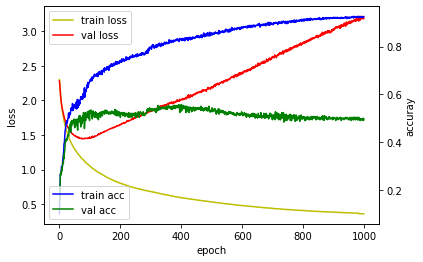

In [11]:
# 1. 데이터셋 준비하기

 

# 훈련셋과 시험셋 로딩

(X_train, Y_train), (X_test, Y_test) = mnist.load_data()

 

# 훈련셋과 검증셋 분리

X_val = X_train[50000:]

Y_val = Y_train[50000:]

X_train = X_train[:50000]

Y_train = Y_train[:50000]

 

X_train = X_train.reshape(50000, 784).astype('float32') / 255.0

X_val = X_val.reshape(10000, 784).astype('float32') / 255.0

X_test = X_test.reshape(10000, 784).astype('float32') / 255.0

 

# 훈련셋, 검증셋 고르기

train_rand_idxs = np.random.choice(50000, 700)

val_rand_idxs = np.random.choice(10000, 300)

 

X_train = X_train[train_rand_idxs]

Y_train = Y_train[train_rand_idxs]

X_val = X_val[val_rand_idxs]

Y_val = Y_val[val_rand_idxs]

 

# 라벨링 전환

Y_train = np_utils.to_categorical(Y_train)

Y_val = np_utils.to_categorical(Y_val)

Y_test = np_utils.to_categorical(Y_test)

 

# 2. 모델 구성하기

model = Sequential()

model.add(Dense(units=2, input_dim=28*28, activation='relu'))

model.add(Dense(units=10, activation='softmax'))

 

# 3. 모델 엮기

model.compile(loss='categorical_crossentropy', optimizer='sgd', metrics=['accuracy'])

 

# 4. 모델 학습시키기

hist = model.fit(X_train, Y_train, epochs=1000, batch_size=10, validation_data=(X_val, Y_val))

 

# 5. 모델 학습 과정 표시하기

# %matplotlib inline

import matplotlib.pyplot as plt

fig, loss_ax = plt.subplots()

 

acc_ax = loss_ax.twinx()

 
loss_ax.plot(hist.history['loss'], 'y', label='train loss')

loss_ax.plot(hist.history['val_loss'], 'r', label='val loss')


acc_ax.plot(hist.history['accuracy'], 'b', label='train acc')

acc_ax.plot(hist.history['val_accuracy'], 'g', label='val acc')

 
loss_ax.set_xlabel('epoch')

loss_ax.set_ylabel('loss')

acc_ax.set_ylabel('accuray')

loss_ax.legend(loc='upper left')

acc_ax.legend(loc='lower left')

 

plt.show()

In [27]:
'''
배치 사이즈와 에포크

케라스에서 만든 모델을 학습할 때는 fit() 함수를 사용합니다

model.fit(x, y, batch_size = 32, epochs = 10)

x : 입럭 데이터 / y : 라벨 값 / batch_size : 몇 개의 샘플로 가중치를 갱신할 것인지 지정 / epochs : 학습 반복 횟수
'''


'\n배치 사이즈와 에포크\n\n케라스에서 만든 모델을 학습할 때는 fit() 함수를 사용합니다\n\nmodel.fit(x, y, batch_size = 32, epochs = 10)\n\nx : 입럭 데이터 / y : 라벨 값 / batch_size : 몇 개의 샘플로 가중치를 갱신할 것인지 지정 / epochs : 학습 반복 횟수\n'